# SMAI Assignment - 2

## Question 4: Multi-layer Perceptrons

### Digit Classification

In this question, you will perform digit classification using MLP. You can use the MLPClassifier from sklearn. Train and two test sets have been provided [here](https://drive.google.com/drive/folders/1OUVrOMp2jSSBDJSqvEyXDFTrhiyZnqit?usp=sharing). Report the accuracy and any other interesting observations.

In [2]:
import numpy as np
import h5py

In [3]:
filename = "training_3digits.hdf5"
train = h5py.File(filename,'r')
train_images = np.array(train['images'])
train_digits = np.array(train['digits'])
train.close()

print(train_images.shape)
print(train_digits.shape)

(2726, 28, 28, 3)
(2726,)


In [8]:
filename = "testing_3digits_part2.hdf5"
test2 = h5py.File(filename,'r')
test_images_2 = np.array(test2['images'])
test_digits_2 = np.array(test2['digits'])
test2.close()

print(test_images_2.shape)
print(test_digits_2.shape)

(3147, 28, 28, 3)
(3147,)


Train images are total of 2726 , each be like 28*28*3. Since there are three channels.
Train digits are total of 2726, each corresponding to digit in the photo.



In [4]:
filename = "testing_3digits_part1.hdf5"
test1 = h5py.File(filename,'r')
test_images_1 = np.array(test1['images'])
test_digits_1 = np.array(test1['digits'])
test1.close()

print(test_images_1.shape)
print(test_digits_1.shape)


(3147, 28, 28, 3)
(3147,)


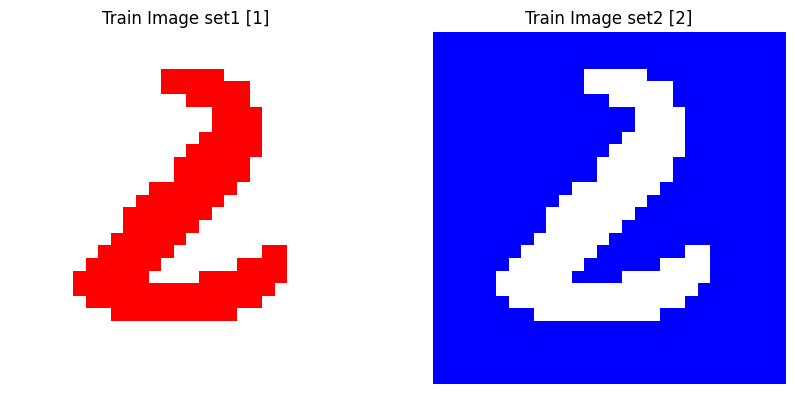

In [19]:
import matplotlib.pyplot as plt

# Display the first image from each set side by side
plt.figure(figsize=(10, 5))

# Plot for train_images set
plt.subplot(1, 2, 1)
plt.title('Train Image set1 [1]')
plt.imshow(test_images_1[1])
plt.axis('off')

# Plot for train_images2 set
plt.subplot(1, 2, 2)
plt.title('Train Image set2 [2]')
plt.imshow(test_images_2[1])
plt.axis('off')

plt.show()


Test Images are total of 3147 ,each be like 28*28*3. Since there are three channels.
Test digits are total of 3147, each corresponding to digit in the photo.

### CASE 1 : DIRECTLY FLATTEN THE IMAGES 


In [17]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
# directly flatten the train images 
train_images_flat = train_images.reshape(train_images.shape[0],-1)
test_images_flat_1= test_images_1.reshape(test_images_1.shape[0],-1)

print(train_images_flat.shape)
print(test_images_flat_1.shape)

# here noe use MLP classifer to fit on the train images and train digits

mlp_1=MLPClassifier(hidden_layer_sizes=(50,),max_iter=100,random_state=42)
mlp_1.fit(train_images_flat,train_digits)

# now use the trained model to predict the test images
predicted_1=mlp_1.predict(test_images_flat_1)
print("Accuracy Score Test1",accuracy_score(test_digits_1,predicted_1))

test_images_flat_2= test_images_2.reshape(test_images_2.shape[0],-1)
predicted_2=mlp_1.predict(test_images_flat_2)
print("Accuracy Score Test2",accuracy_score(test_digits_2,predicted_2))


                    

(2726, 2352)
(3147, 2352)
Accuracy Score Test1 1.0
Accuracy Score Test2 0.0


### CASE 2: CONVERT THEM INTO THE GRAY IMAGES AND THEN FLATTEN THEM

In [24]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# flatten the images for input to the MLP
# Flatten the images for MLP input
gray_train_images = np.dot(train_images[..., :3], [0.299, 0.587, 0.114])
gray_test_images= np.dot(test_images_1[..., :3], [0.299, 0.587, 0.114])

# Flatten the images for MLP input
gray_images_flattened = gray_train_images.reshape((gray_train_images.shape[0], -1))
gray_test_images_flattened = gray_test_images.reshape((gray_test_images.shape[0], -1))

gray_test_images_2= np.dot(test_images_2[..., :3], [0.299, 0.587, 0.114])
gray_test_images_flattened_2 = gray_test_images_2.reshape((gray_test_images_2.shape[0], -1))




In [25]:
# Train MLP Classifier
mlp_2=MLPClassifier(hidden_layer_sizes=(50,),max_iter=300,random_state=42)
mlp_2.fit(gray_images_flattened, train_digits)
print("Accuracy Score test1",accuracy_score(test_digits_1, mlp_2.predict(gray_test_images_flattened)))
print("Accuracy Score test2",accuracy_score(test_digits_2, mlp_2.predict(gray_test_images_flattened_2)))



Accuracy Score test1 0.9945980298697172
Accuracy Score test2 0.3606609469335875


**Observation:**

In the initial analysis, we noted that the accuracy for the first test set was perfect (1.0), while the accuracy for the second test set was zero. This discrepancy prompted further investigation.

**Insight:**

Upon closer examination, we discovered that the model was trained on color images where the digits were colored. Consequently, the model performed exceptionally well on the first test set, which also contained colored digits.

However, the second test set consisted of uncolored digits, leading to a lack of recognition by the initially trained model and resulting in zero accuracy.

**Solution:**

To address this issue, we experimented with converting the images to grayscale. The grayscale conversion proved to be beneficial, especially for the second test set. The accuracy significantly improved to 30 percent. This enhancement highlights the importance of considering the color characteristics during training and adjusting accordingly for diverse test sets.

- The decision on the number of layers and other parameters was iteratively optimized through experiments on various cases. This iterative approach is essential for adapting the model to different scenarios and ensuring robust performance across diverse datasets.